In [3]:
!unzip /content/data_animals.zip

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

In [7]:

import os
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception,preprocess_input

from keras.preprocessing import image
from keras.layers import Input
from tensorflow.keras.backend import reshape
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
#from lshash import LSHash

In [29]:
os.listdir("/content/animals/animals/boar/")

['12c58c5e8c.jpg',
 '68b228e6ca.jpg',
 '17c67e42a7.jpg',
 '7bcca83462.jpg',
 '8b56ccd502.jpg',
 '0d168ffd8a.jpg',
 '79b4862abe.jpg',
 '3fc82d21eb.jpg',
 '183f0cd1c2.jpg',
 '89d3a108ef.jpg',
 '28aea02d8b.jpg',
 '351fc18170.jpg',
 '517c9f6d24.jpg',
 '580d7cc298.jpg',
 '4b3234a9cf.jpg',
 '2c23b537e2.jpg',
 '9f4587d093.jpg',
 '640adadebc.jpg',
 '942a4ed80a.jpg',
 '3c34dc709e.jpg',
 '2fa8d16887.jpg',
 '0903d0db72.jpg',
 '911a9d2f67.jpg',
 '549c6255cb.jpg',
 '7f1d39763e.jpg',
 '4f5b8e247e.jpg',
 '3d28ab32a5.jpg',
 '343c23952b.jpg',
 '5d00af3e3f.jpg',
 '7dbc8fac10.jpg',
 '755f1917ac.jpg',
 '2bec6d90a6.jpg',
 '5aa8637cf7.jpg',
 '94bbb828ba.jpg',
 '9d842e6c27.jpg',
 '5d4baab2e0.jpg',
 '684b815f3d.jpg',
 '149cf25549.jpg',
 '0b2e935388.jpg',
 '4f712dd94c.jpg',
 '61c314e564.jpg',
 '2e85f933b3.jpg',
 '481db3c9bd.jpg',
 '25ec8c79ee.jpg',
 '1e28d918cf.jpg',
 '7b435a22dd.jpg',
 '2005eb9945.jpg',
 '981d244af2.jpg',
 '5297f21f92.jpg',
 '583c3a1d3e.jpg',
 '13e49ce33a.jpg',
 '4c9de46c24.jpg',
 '287ebb3999

In [ ]:
import glob

txtfiles = []
for file in glob.glob("*.txt"):
    txtfiles.append(file)

In [32]:

def preprocess_img(img_path):
  dsize = (299,299)
  new_image=cv2.imread(img_path)
  new_image=cv2.resize(new_image,dsize,interpolation=cv2.INTER_NEAREST)
  new_image=np.expand_dims(new_image,axis=0)
  new_image=preprocess_input(new_image)
  return new_image

def load_data():
    output = []
    pp=[]
    directory = "/content/animals/animals"
    categories=sorted(os.listdir(directory))
    print(categories)
    for files in sorted(os.listdir(directory)):
      for file in os.listdir(directory+'/'+files):
        print(file)
        img_path=directory+"/"+files+"/"+file
        output.append(img_path)
    return output

In [33]:
load_data()

Streaming output truncated to the last 5000 lines.
50ec617e59.jpg
8e34044b98.jpg
1a993de5a8.jpg
2e25157a7f.jpg
150de5d9c4.jpg
59c044d6bb.jpg
2e29f399bd.jpg
73b10839bc.jpg
88b723ce90.jpg
35e68b0489.jpg
1c4993f09f.jpg
5fb564e371.jpg
6e58d5608a.jpg
862e2c6379.jpg
7ba5eee91f.jpg
1fe7411d04.jpg
8fce80d5ba.jpg
7d214aab4b.jpg
2fe9812e0d.jpg
66b5df00e3.jpg
12c58c5e8c.jpg
68b228e6ca.jpg
17c67e42a7.jpg
7bcca83462.jpg
8b56ccd502.jpg
0d168ffd8a.jpg
79b4862abe.jpg
3fc82d21eb.jpg
183f0cd1c2.jpg
89d3a108ef.jpg
28aea02d8b.jpg
351fc18170.jpg
517c9f6d24.jpg
580d7cc298.jpg
4b3234a9cf.jpg
2c23b537e2.jpg
9f4587d093.jpg
640adadebc.jpg
942a4ed80a.jpg
3c34dc709e.jpg
2fa8d16887.jpg
0903d0db72.jpg
911a9d2f67.jpg
549c6255cb.jpg
7f1d39763e.jpg
4f5b8e247e.jpg
3d28ab32a5.jpg
343c23952b.jpg
5d00af3e3f.jpg
7dbc8fac10.jpg
755f1917ac.jpg
2bec6d90a6.jpg
5aa8637cf7.jpg
94bbb828ba.jpg
9d842e6c27.jpg
5d4baab2e0.jpg
684b815f3d.jpg
149cf25549.jpg
0b2e935388.jpg
4f712dd94c.jpg
61c314e564.jpg
2e85f933b3.jpg
481db3c9bd.jpg
25ec

['/content/animals/animals/antelope/0fb2e9aa81.jpg',
 '/content/animals/animals/antelope/fc1dd26858.jpg',
 '/content/animals/animals/antelope/9c4d85f9d8.jpg',
 '/content/animals/animals/antelope/0c16ef86c0.jpg',
 '/content/animals/animals/antelope/6fb2619e84.jpg',
 '/content/animals/animals/antelope/17ddf07f85.jpg',
 '/content/animals/animals/antelope/1a3f59ee02.jpg',
 '/content/animals/animals/antelope/fd085737a4.jpg',
 '/content/animals/animals/antelope/27a5369441.jpg',
 '/content/animals/animals/antelope/95db50fb56.jpg',
 '/content/animals/animals/antelope/0b688923b0.jpg',
 '/content/animals/animals/antelope/058fa9a60f.jpg',
 '/content/animals/animals/antelope/82e0981104.jpg',
 '/content/animals/animals/antelope/9a58695d48.jpg',
 '/content/animals/animals/antelope/27d251fa65.jpg',
 '/content/animals/animals/antelope/26ffc1ee1f.jpg',
 '/content/animals/animals/antelope/6aa06f252d.jpg',
 '/content/animals/animals/antelope/0b1a3af197.jpg',
 '/content/animals/animals/antelope/fc6545699d

In [13]:

def model():
  model=Xception(weights='imagenet',include_top=False)
  for layer in model.layers:
    layer.trainable=False
  #model.summary()
  return model

def feature_extraction(image_data,model):
  features=model.predict(image_data)
  features=np.array(features)
  features=features.flatten()
  return features

In [14]:
def result_vector_cosine(model,feature_vector,new_img):
  new_feature = model.predict(new_img)
  new_feature = np.array(new_feature)
  new_feature = new_feature.flatten()
  N_result = 6
  nbrs = NearestNeighbors(n_neighbors=N_result, metric="cosine").fit(feature_vector)
  distances, indices = nbrs.kneighbors([new_feature])
  return(indices)

#LSH code taken from https://towardsdatascience.com/finding-similar-images-using-deep-learning-and-locality-sensitive-hashing-9528afee02f5
def result_vector_lsh(img_path,feature_vec,new_img):
  k = 10
  L = 5
  d = 27648
  lsh = LSHash(hash_size=k, input_dim=d, num_hashtables=L)
  for img_path, vec in (feature_vec):
      lsh.index(vec.flatten(), extra_data=img_path)
  response = lsh.query(new_img, num_results= 1)


Streaming output truncated to the last 5000 lines.
60e6114a8a.jpg
63a57d9527.jpg
6bd95d1776.jpg
4862ffccc5.jpg
27e70134f5.jpg
110f709dfb.jpg
8f9c022352.jpg
1c1de9b3a2.jpg
2c8a89664b.jpg
3513bc5551.jpg
78c0646afd.jpg
799eea3f84.jpg
3c19f4785b.jpg
620fc0d86e.jpg
6a09b0f37d.jpg
13bc40b533.jpg
9e9409f4fd.jpg
1c382b3385.jpg
16b44ef03b.jpg
5e0bb64200.jpg
49da7810ae.jpg
2105f72d23.jpg
88cb3b58df.jpg
26c0074cef.jpg
914e36917d.jpg
48c662d1ce.jpg
6ef1439231.jpg
8c44899790.jpg
8c25f34950.jpg
10dd21a05c.jpg
7af84c6e5a.jpg
11ccf63df4.jpg
85e36e035c.jpg
600bce49ef.jpg
3fd3aebc4b.jpg
2e59b6e7c7.jpg
215f5c919b.jpg
37a1b4de80.jpg
60eb7f058d.jpg
8d88a86d91.jpg
46af339620.jpg
730d6a8791.jpg
83e8a824a2.jpg
1a2dce7848.jpg
34fb30ecc5.jpg
6128bd1a84.jpg
6edc079fcf.jpg
66548aefad.jpg
6a5e9eac29.jpg
0c3d04bcf5.jpg
5e07a0666d.jpg
636b432421.jpg
4815f8dfaa.jpg
2a40de8365.jpg
81b58d7d07.jpg
76273ddb00.jpg
5a5cdbdc6b.jpg
612c521481.jpg
578d493138.jpg
32cd00f171.jpg
4c6ff6dae0.jpg
39ae72da61.jpg
8af49688fa.jpg
354b

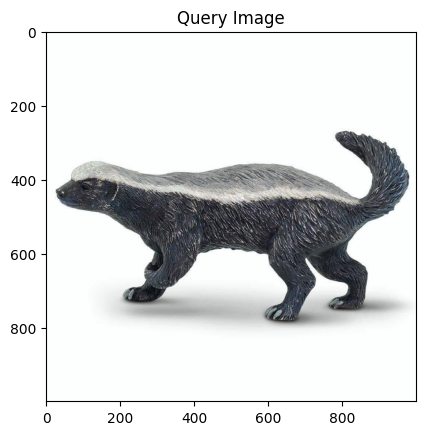

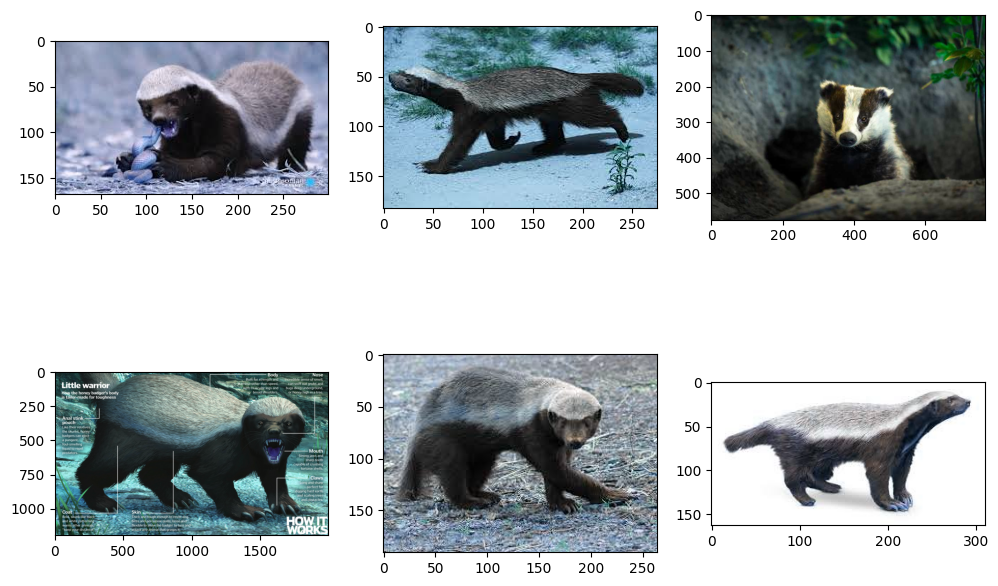

In [34]:

def input_show(data):
  plt.title("Query Image")
  plt.imshow(data)

def show_result(data,result):
  fig = plt.figure(figsize=(12,8))
  for i in range(0,6):
    index_result=result[0][i]
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.imread(data[index_result]))
  plt.show()

def main():
  features=[]
  output=load_data()
  #print(output)
  main_model=model()
  #Limiting the data for training
  for i in output[:99]:
    new_img=preprocess_img(i)
    features.append(feature_extraction(new_img,main_model))
  feature_vec = np.array(features)
  result=result_vector_cosine(main_model,feature_vec,preprocess_img(output[100]))
  input_show(cv2.imread(output[100]))
  show_result(output,result)


if __name__=='__main__':
  main()

Streaming output truncated to the last 5000 lines.
60e6114a8a.jpg
63a57d9527.jpg
6bd95d1776.jpg
4862ffccc5.jpg
27e70134f5.jpg
110f709dfb.jpg
8f9c022352.jpg
1c1de9b3a2.jpg
2c8a89664b.jpg
3513bc5551.jpg
78c0646afd.jpg
799eea3f84.jpg
3c19f4785b.jpg
620fc0d86e.jpg
6a09b0f37d.jpg
13bc40b533.jpg
9e9409f4fd.jpg
1c382b3385.jpg
16b44ef03b.jpg
5e0bb64200.jpg
49da7810ae.jpg
2105f72d23.jpg
88cb3b58df.jpg
26c0074cef.jpg
914e36917d.jpg
48c662d1ce.jpg
6ef1439231.jpg
8c44899790.jpg
8c25f34950.jpg
10dd21a05c.jpg
7af84c6e5a.jpg
11ccf63df4.jpg
85e36e035c.jpg
600bce49ef.jpg
3fd3aebc4b.jpg
2e59b6e7c7.jpg
215f5c919b.jpg
37a1b4de80.jpg
60eb7f058d.jpg
8d88a86d91.jpg
46af339620.jpg
730d6a8791.jpg
83e8a824a2.jpg
1a2dce7848.jpg
34fb30ecc5.jpg
6128bd1a84.jpg
6edc079fcf.jpg
66548aefad.jpg
6a5e9eac29.jpg
0c3d04bcf5.jpg
5e07a0666d.jpg
636b432421.jpg
4815f8dfaa.jpg
2a40de8365.jpg
81b58d7d07.jpg
76273ddb00.jpg
5a5cdbdc6b.jpg
612c521481.jpg
578d493138.jpg
32cd00f171.jpg
4c6ff6dae0.jpg
39ae72da61.jpg
8af49688fa.jpg
354b

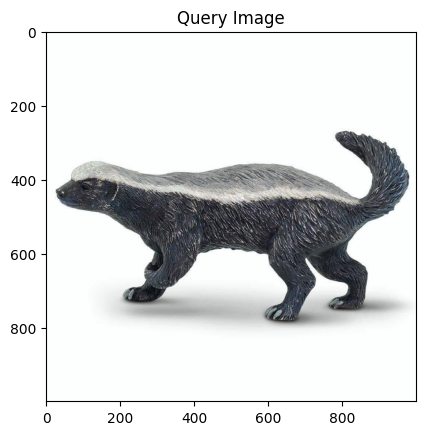

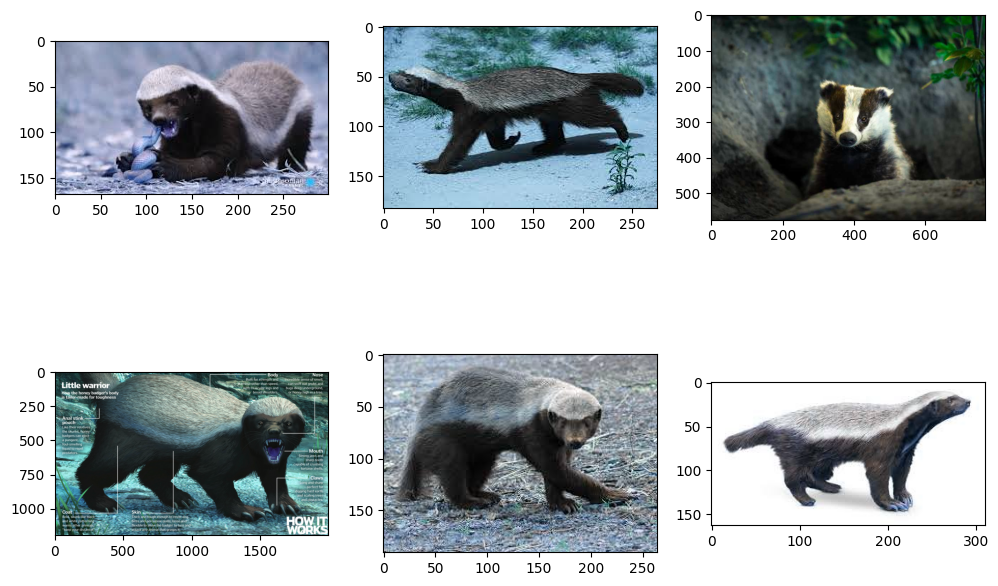

In [37]:
features=[]
output=load_data()
#print(output)
main_model=model()
#Limiting the data for training
for i in output[:99]:
  new_img=preprocess_img(i)
  features.append(feature_extraction(new_img,main_model))
feature_vec = np.array(features)
result=result_vector_cosine(main_model,feature_vec,preprocess_img(output[100]))
input_show(cv2.imread(output[100]))
show_result(output,result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


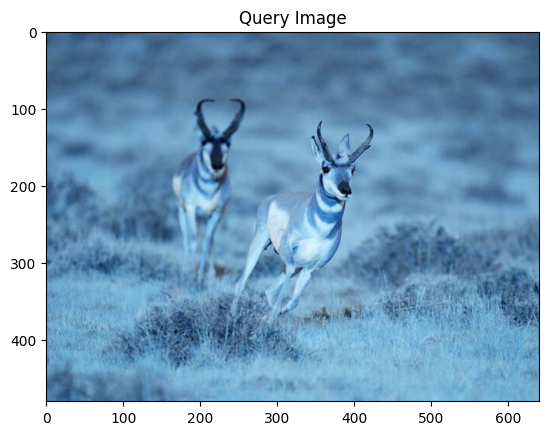

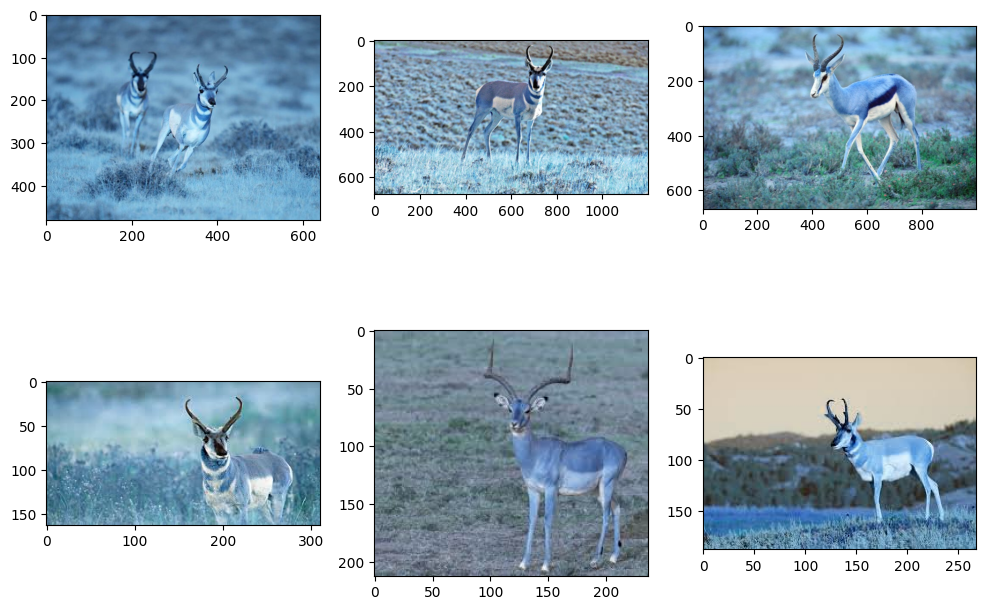

In [40]:
result=result_vector_cosine(main_model,feature_vec,preprocess_img(output[10]))
input_show(cv2.imread(output[10]))
show_result(output,result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


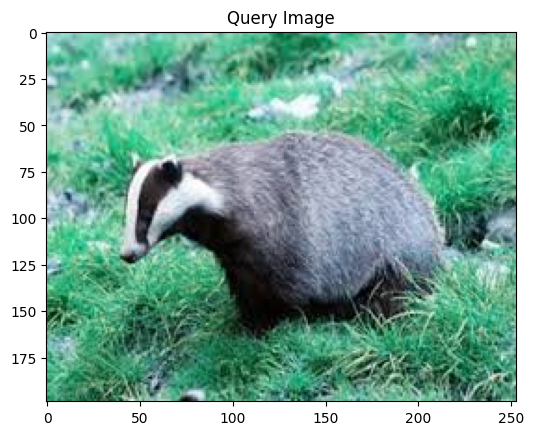

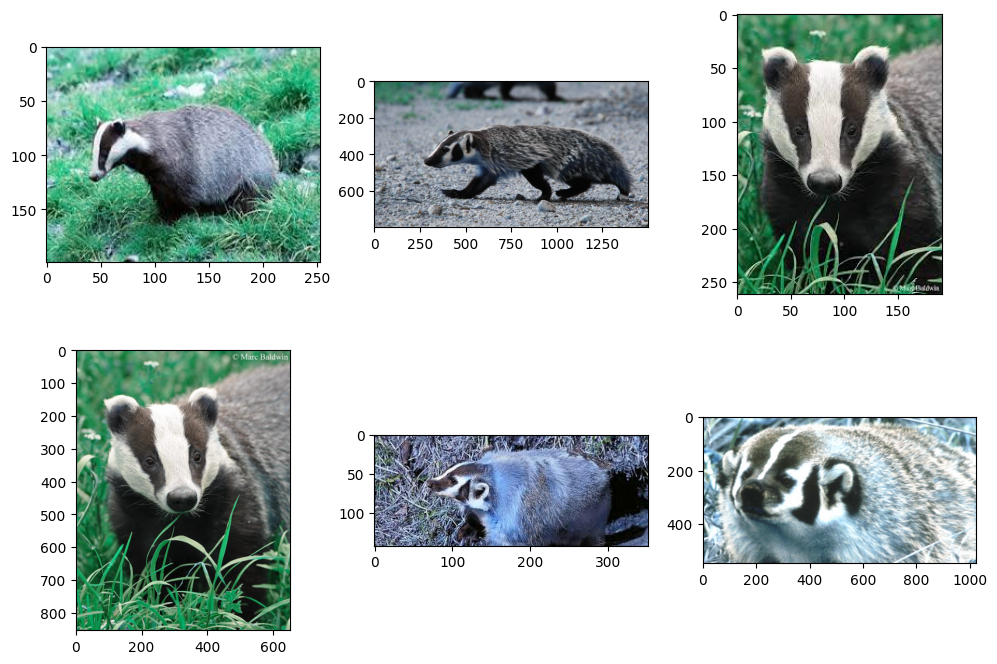

In [42]:
result=result_vector_cosine(main_model,feature_vec,preprocess_img(output[80]))
input_show(cv2.imread(output[80]))
show_result(output,result)